In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_1446/1789357619.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [52]:
# Ensure `data` is valid
print(type(data))  # Confirm it's a DataFrame

<class 'pandas.core.frame.DataFrame'>


In [53]:
# Display the first few rows of the dataset
data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [54]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                    

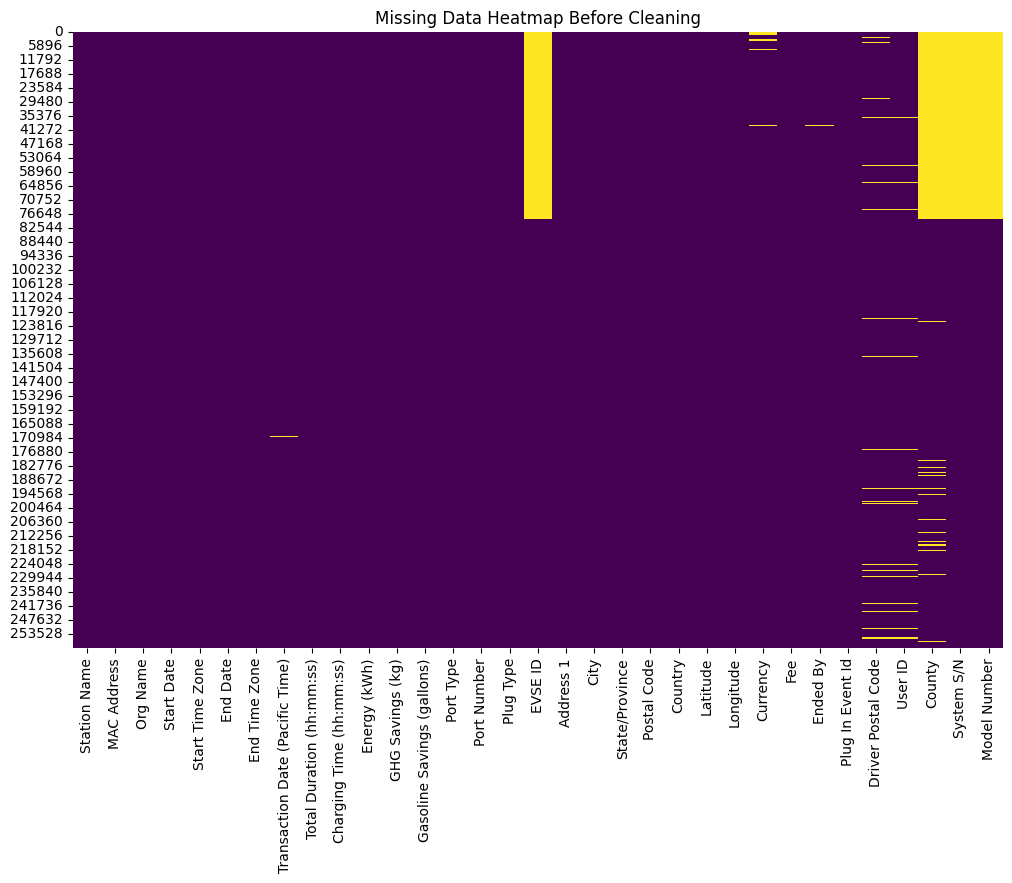

In [55]:
# Visualize missing data with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap Before Cleaning")
plt.show()

In [56]:
# Data cleaning
# 1. Convert date columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce')

# 2. Handle missing values

In [57]:
# Replace missing categorical values
categorical_columns = ['County', 'Port Type', 'Plug Type', 'Org Name', 'Currency', 'Ended By']
for col in categorical_columns:
    data[col] = data[col].fillna('Not Specified')

In [58]:
# Replace missing numerical values
numerical_columns = ['Energy (kWh)', 'Fee', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'EVSE ID', 'Driver Postal Code']
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

In [59]:
# Drop rows with missing values in critical columns
data.dropna(subset=['User ID', 'Start Date', 'End Date', 'Transaction Date (Pacific Time)'], inplace=True)

In [60]:
# Sort data by User ID and Start Date
data.sort_values(by=['User ID', 'Start Date'], inplace=True)

In [61]:
# Check for missing values after combining
missing_values_after_combining = data.isnull().sum()
print("Missing values after combining by User ID:\n", missing_values_after_combining)

Missing values after combining by User ID:
 Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)        0
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              0
Port Number                            0
Plug Type                              0
EVSE ID                                0
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude    

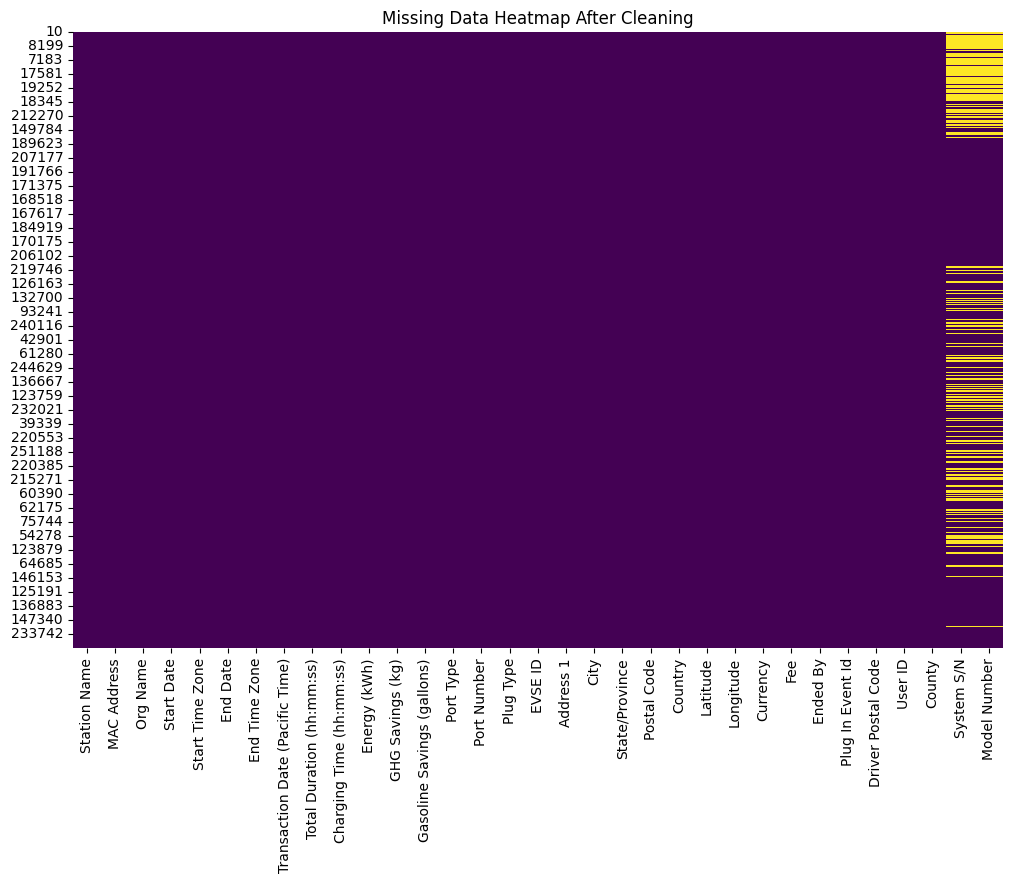

In [62]:
# Visualize missing data after cleaning with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap After Cleaning")
plt.show()

In [63]:
# Save the cleaned
data.to_csv('cleaned_EVChargingStationUsage.csv', index=False)

In [64]:
cleaned_data_path = 'cleaned_EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(cleaned_data_path)
data

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_1446/2583401971.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(cleaned_data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2011-08-02 12:26:00,PDT,2011-08-02 13:27:00,PDT,2011-08-02 13:27:00,1:00:50,1:00:43,...,-122.160263,USD,0.00,Plug Out at Vehicle,8,94304.0,0.0,Not Specified,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-04 20:13:00,PDT,2011-08-04 23:11:00,PDT,2011-08-04 23:11:00,2:58:33,2:57:27,...,-122.160309,USD,0.00,Plug Out at Vehicle,19,94304.0,0.0,Not Specified,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-08 16:27:00,PDT,2011-08-08 18:11:00,PDT,2011-08-08 18:11:00,1:43:24,1:43:18,...,-122.160309,Not Specified,0.00,Plug Out at Vehicle,1312846070,94304.0,0.0,Not Specified,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-18 11:59:00,PDT,2011-08-18 13:42:00,PDT,2011-08-18 13:42:00,2:24:23,1:42:53,...,-122.160309,Not Specified,0.00,Plug Out at Vehicle,53,94304.0,0.0,Not Specified,NaN,NaN
4,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2011-08-27 13:42:00,PDT,2011-08-27 15:36:00,PDT,2011-08-27 15:36:00,1:53:25,1:53:13,...,-122.160263,Not Specified,0.00,Plug Out at Vehicle,1314477764,94304.0,0.0,Not Specified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251503,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2019-08-02 16:50:00,PDT,2019-08-02 19:01:00,PDT,2019-08-02 19:01:00,2:11:00,2:10:50,...,-122.160370,USD,1.40,Plug Out at Vehicle,15858,95138.0,99943,Santa Clara County,1.119100e+11,CT2100-HD-CDMA-CCR
251504,PALO ALTO CA / HAMILTON #2,0024:B100:0002:965D,City of Palo Alto,2019-08-16 16:53:00,PDT,2019-08-16 18:54:00,PDT,2019-08-16 18:55:00,2:00:58,2:00:45,...,-122.160324,USD,1.31,Plug Out at Vehicle,6356,95138.0,99943,Santa Clara County,1.739410e+11,CT4020-HD-GW
251505,PALO ALTO CA / HAMILTON #2,0024:B100:0002:965D,City of Palo Alto,2019-10-11 17:01:00,PDT,2019-10-11 18:40:00,PDT,2019-10-11 18:42:00,1:39:06,1:38:35,...,-122.160324,USD,1.06,Plug Out at Vehicle,6970,95138.0,99943,Santa Clara County,1.739410e+11,CT4020-HD-GW
251506,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2019-11-22 16:32:00,PST,2019-11-22 18:46:00,PST,2019-11-22 18:46:00,2:14:16,2:14:01,...,-122.160370,USD,1.42,Plug Out at Vehicle,16453,95138.0,99943,Santa Clara County,1.119100e+11,CT2100-HD-CDMA-CCR


In [65]:
# Ensure `data` is valid
print(type(data))  # Confirm it's a DataFrame

<class 'pandas.core.frame.DataFrame'>


## Handling user ID
---

In [66]:
# Inspect the column names in the DataFrame
print(data.columns)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')


In [67]:
data=data.set_index('User ID')
data

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,County,System S/N,Model Number
User ID,,,,,,,,,,,,,,,,,,,,,
0.0,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2011-08-02 12:26:00,PDT,2011-08-02 13:27:00,PDT,2011-08-02 13:27:00,1:00:50,1:00:43,...,37.444607,-122.160263,USD,0.00,Plug Out at Vehicle,8,94304.0,Not Specified,NaN,NaN
0.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-04 20:13:00,PDT,2011-08-04 23:11:00,PDT,2011-08-04 23:11:00,2:58:33,2:57:27,...,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,19,94304.0,Not Specified,NaN,NaN
0.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-08 16:27:00,PDT,2011-08-08 18:11:00,PDT,2011-08-08 18:11:00,1:43:24,1:43:18,...,37.444572,-122.160309,Not Specified,0.00,Plug Out at Vehicle,1312846070,94304.0,Not Specified,NaN,NaN
0.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-18 11:59:00,PDT,2011-08-18 13:42:00,PDT,2011-08-18 13:42:00,2:24:23,1:42:53,...,37.444572,-122.160309,Not Specified,0.00,Plug Out at Vehicle,53,94304.0,Not Specified,NaN,NaN
0.0,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2011-08-27 13:42:00,PDT,2011-08-27 15:36:00,PDT,2011-08-27 15:36:00,1:53:25,1:53:13,...,37.444607,-122.160263,Not Specified,0.00,Plug Out at Vehicle,1314477764,94304.0,Not Specified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99943,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2019-08-02 16:50:00,PDT,2019-08-02 19:01:00,PDT,2019-08-02 19:01:00,2:11:00,2:10:50,...,37.444489,-122.160370,USD,1.40,Plug Out at Vehicle,15858,95138.0,Santa Clara County,1.119100e+11,CT2100-HD-CDMA-CCR
99943,PALO ALTO CA / HAMILTON #2,0024:B100:0002:965D,City of Palo Alto,2019-08-16 16:53:00,PDT,2019-08-16 18:54:00,PDT,2019-08-16 18:55:00,2:00:58,2:00:45,...,37.444706,-122.160324,USD,1.31,Plug Out at Vehicle,6356,95138.0,Santa Clara County,1.739410e+11,CT4020-HD-GW
99943,PALO ALTO CA / HAMILTON #2,0024:B100:0002:965D,City of Palo Alto,2019-10-11 17:01:00,PDT,2019-10-11 18:40:00,PDT,2019-10-11 18:42:00,1:39:06,1:38:35,...,37.444706,-122.160324,USD,1.06,Plug Out at Vehicle,6970,95138.0,Santa Clara County,1.739410e+11,CT4020-HD-GW


In [68]:
 # Aggregate data for each user
user_summary = data.groupby('User ID').agg({
    'Energy (kWh)': 'sum',
    'Charging Time (hh:mm:ss)': 'count',  # Number of charging sessions
    'Fee': 'sum',  # Total fee
    'Start Date': ['min', 'max'],  # First and last session dates
})
print(user_summary)

        Energy (kWh) Charging Time (hh:mm:ss)     Fee           Start Date  \
                 sum                    count     sum                  min   
User ID                                                                      
0.0      2799.745277                      414    0.00  2011-08-02 12:26:00   
102.0      17.485545                        2    0.00  2013-09-28 15:59:00   
107.0      35.231512                        8    0.00  2011-12-22 11:43:00   
111.0     117.863251                       19    0.00  2011-10-18 14:31:00   
140.0       5.066295                        2    0.00  2013-10-28 16:29:00   
...              ...                      ...     ...                  ...   
997651      9.020000                        2    2.08  2017-10-07 14:01:00   
997831   1048.932000                      196  340.47  2017-09-16 11:07:00   
998031     30.780000                        2    7.08  2017-09-19 11:23:00   
998481     12.360000                        1    2.86  2017-09-1

In [69]:
# Features for clustering
user_features = data.groupby('User ID').agg({
    'Energy (kWh)': 'sum',
    'Fee': 'sum',
    'Charging Time (hh:mm:ss)': 'count'
}).reset_index()

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(user_features.drop('User ID', axis=1))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_features['Cluster'] = kmeans.fit_predict(normalized_features)

# View clusters
print(user_features)

      User ID  Energy (kWh)     Fee  Charging Time (hh:mm:ss)  Cluster
0         0.0   2799.745277    0.00                       414        2
1       102.0     17.485545    0.00                         2        0
2       107.0     35.231512    0.00                         8        0
3       111.0    117.863251    0.00                        19        0
4       140.0      5.066295    0.00                         2        0
...       ...           ...     ...                       ...      ...
26966  997651      9.020000    2.08                         2        0
26967  997831   1048.932000  340.47                       196        1
26968  998031     30.780000    7.08                         2        0
26969  998481     12.360000    2.86                         1        0
26970   99943     51.270966    6.72                         9        0

[26971 rows x 5 columns]


# Exploratory Data Analysis (EDA)
---

#### Visualizing Key Features

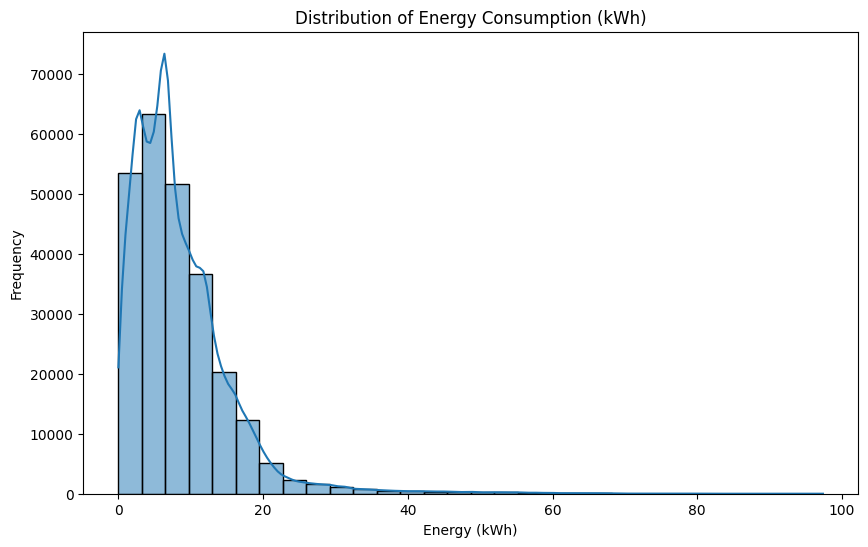

In [70]:
# 1. Histogram for Energy (kWh)
plt.figure(figsize=(10, 6))
sns.histplot(data['Energy (kWh)'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.show()

In [71]:
# Create a sample DataFrame with charging time data in seconds
charging_data = pd.DataFrame({
    'Charging Time (seconds)': np.random.exponential(scale=1e6, size=1000)  # Example data
})

# Convert charging times from seconds to hours
charging_data['Charging Time (hours)'] = charging_data['Charging Time (seconds)'] / 3600

# Calculate mean and median in hours
mean_charging_time = charging_data['Charging Time (hours)'].mean()
median_charging_time = charging_data['Charging Time (hours)'].median()

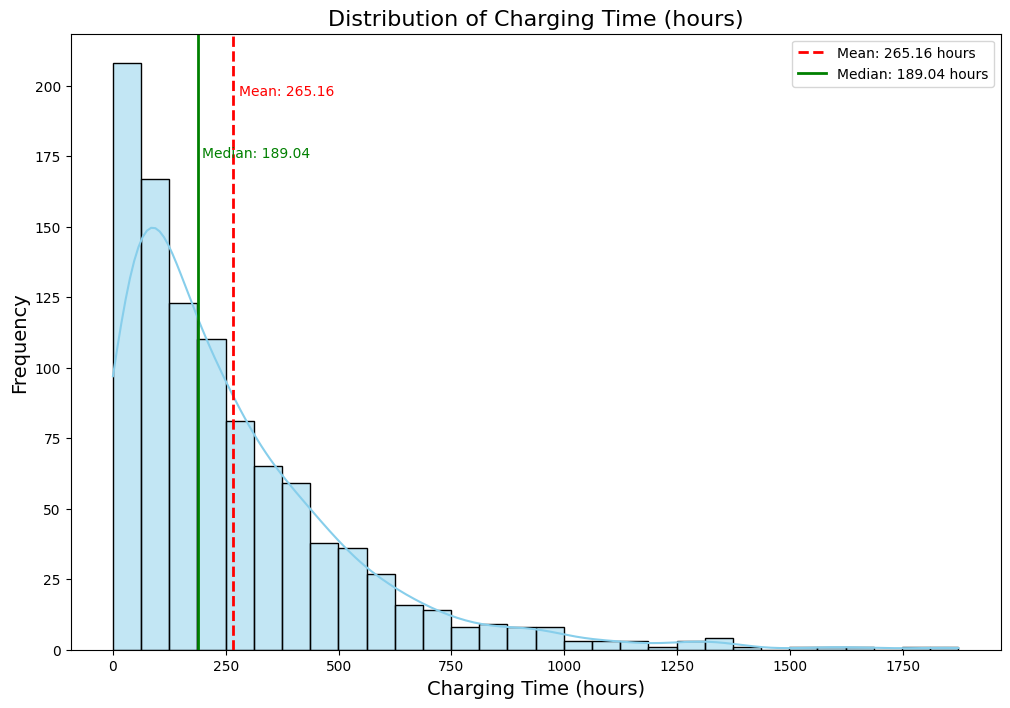

In [72]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.histplot(charging_data['Charging Time (hours)'], bins=30, kde=True, color='skyblue')

# Add mean and median lines
plt.axvline(mean_charging_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_charging_time:.2f} hours')
plt.axvline(median_charging_time, color='green', linestyle='-', linewidth=2, label=f'Median: {median_charging_time:.2f} hours')

# Add annotations
plt.text(mean_charging_time + mean_charging_time * 0.05, plt.ylim()[1] * 0.9, f'Mean: {mean_charging_time:.2f}', color='red')
plt.text(median_charging_time + median_charging_time * 0.05, plt.ylim()[1] * 0.8, f'Median: {median_charging_time:.2f}', color='green')

# Add titles and labels
plt.title('Distribution of Charging Time (hours)', fontsize=16)
plt.xlabel('Charging Time (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot
plt.show()

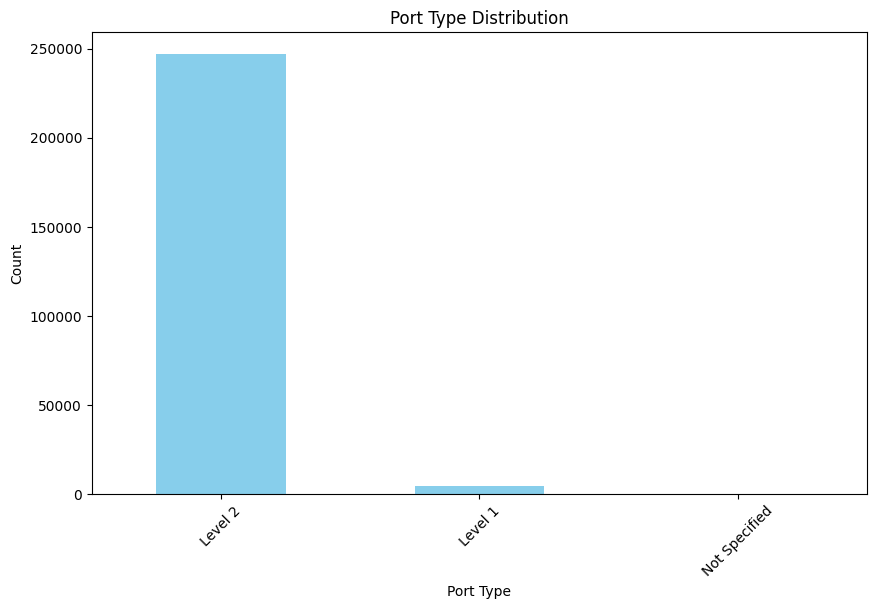

In [73]:
# 3. Bar chart for Port Type
if 'Port Type' in data.columns:
	plt.figure(figsize=(10, 6))
	data['Port Type'].value_counts().plot(kind='bar', color='skyblue')
	plt.title('Port Type Distribution')
	plt.xlabel('Port Type')
	plt.ylabel('Count')
	plt.xticks(rotation=45)
	plt.show()
else:
	print("Column 'Port Type' does not exist in the DataFrame.")

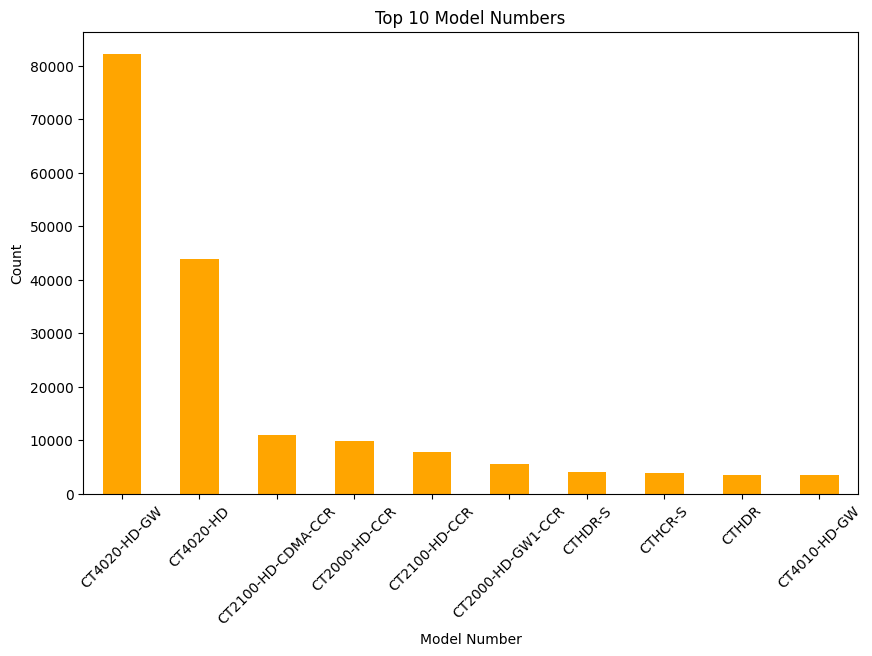

In [74]:
# 4. Bar chart for Model Number
plt.figure(figsize=(10, 6))
data['Model Number'].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Model Numbers')
plt.xlabel('Model Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Time-Based Trends

In [75]:
# Ensure 'Start Date' is in datetime format
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')

# Extract relevant time features
data['Hour'] = data['Start Date'].dt.hour  # Extract hour
data['Weekday'] = data['Start Date'].dt.weekday  # Extract weekday (0=Monday, 6=Sunday)
data['Weekend'] = data['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')  # Categorize as Weekend/Weekday

# Verify the extracted columns
print(data[['Start Date', 'Hour', 'Weekday', 'Weekend']])

                 Start Date  Hour  Weekday  Weekend
User ID                                            
0.0     2011-08-02 12:26:00    12        1  Weekday
0.0     2011-08-04 20:13:00    20        3  Weekday
0.0     2011-08-08 16:27:00    16        0  Weekday
0.0     2011-08-18 11:59:00    11        3  Weekday
0.0     2011-08-27 13:42:00    13        5  Weekend
...                     ...   ...      ...      ...
99943   2019-08-02 16:50:00    16        4  Weekday
99943   2019-08-16 16:53:00    16        4  Weekday
99943   2019-10-11 17:01:00    17        4  Weekday
99943   2019-11-22 16:32:00    16        4  Weekday
99943   2020-02-13 16:28:00    16        3  Weekday

[251508 rows x 4 columns]


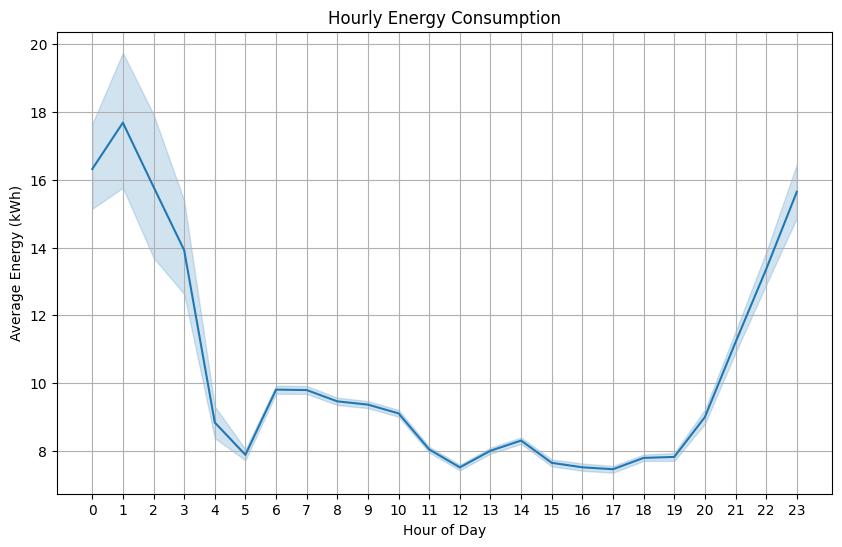

In [76]:
# 1. Hourly Usage Patterns
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Hour', y='Energy (kWh)')
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy (kWh)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

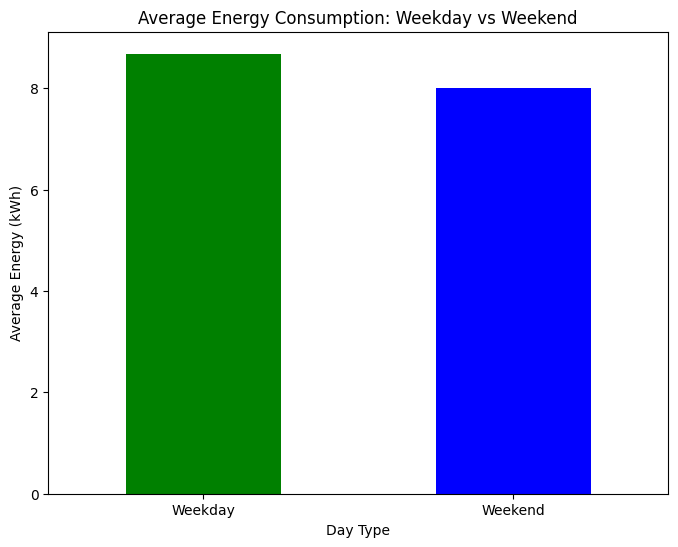

In [77]:
# 2. Weekday vs Weekend
weekday_energy = data.groupby('Weekend')['Energy (kWh)'].mean()

plt.figure(figsize=(8, 6))
weekday_energy.plot(kind='bar', color=['green', 'blue'])
plt.title('Average Energy Consumption: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average Energy (kWh)')
plt.xticks(rotation=0)
plt.show()

## **Mandatory Component**
---

### **1: Cluster**

- Night vs day
- Weekday vs weekend
- Morning vs afternoon vs evening
- Location (longitude x latitude)
- Model number
- Port type
- Start time and end time
- plug and unplug
- end time vs unpluged 
- Er der en større opladning alt efter hvor du bor i landet 
- Hvilke systemtype er mest populær
- 

#### Energy for each user

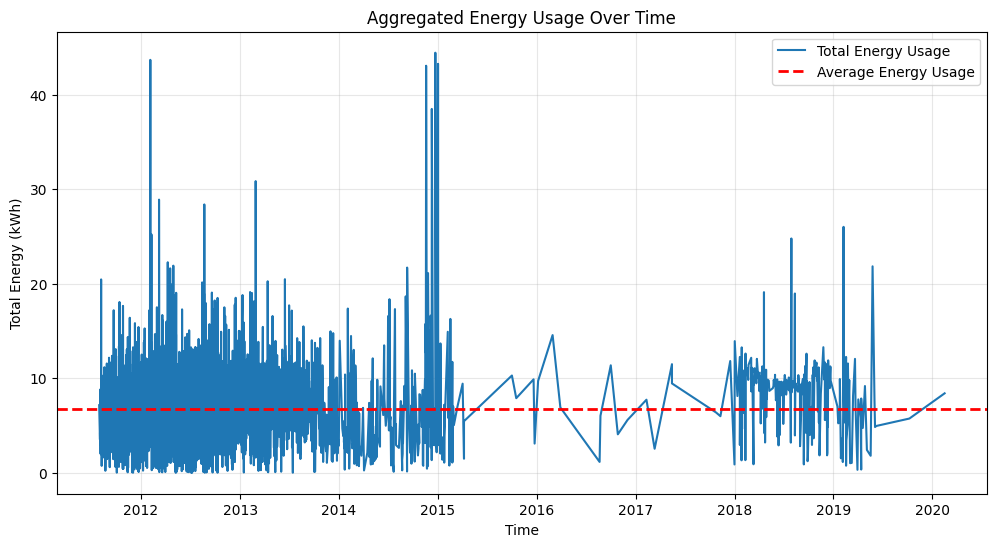

In [78]:
# Reset index to access 'User ID' as a column
data_reset = data.reset_index()

# Reduce data size by filtering for a specific time range or user subset
filtered_data = data_reset[data_reset['User ID'].isin(data_reset['User ID'].unique()[:100])]  # Only first 100 users for example

# Group by 'Start Date' and aggregate energy usage
aggregated_data = filtered_data.groupby(['Start Date']).sum(numeric_only=True)['Energy (kWh)']

# Plot aggregated data
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data.index, aggregated_data.values, label="Total Energy Usage")

# Calculate and plot average energy usage
average_energy = aggregated_data.mean()
plt.axhline(y=average_energy, color='r', linestyle='--', linewidth=2, label='Average Energy Usage')

# Customize the plot
plt.title("Aggregated Energy Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

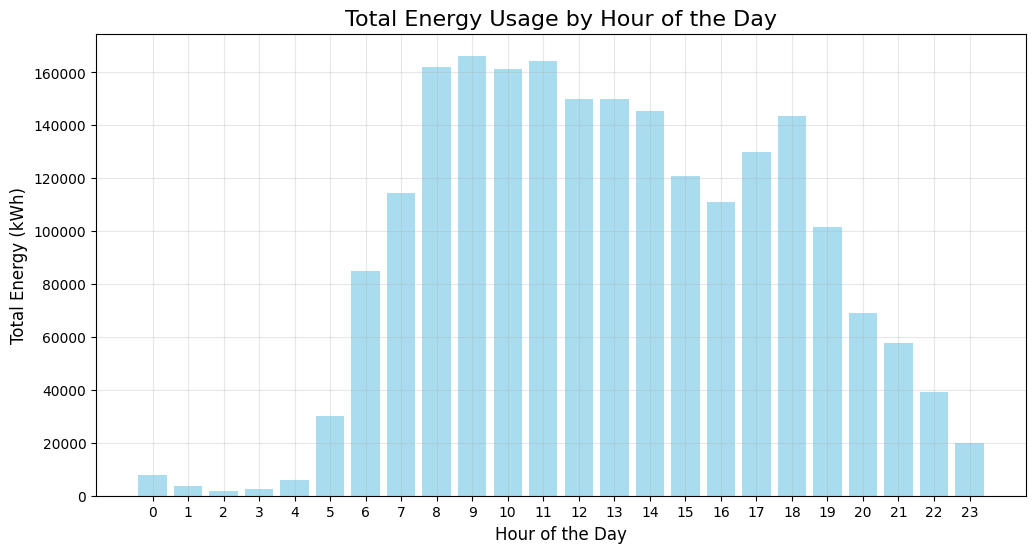

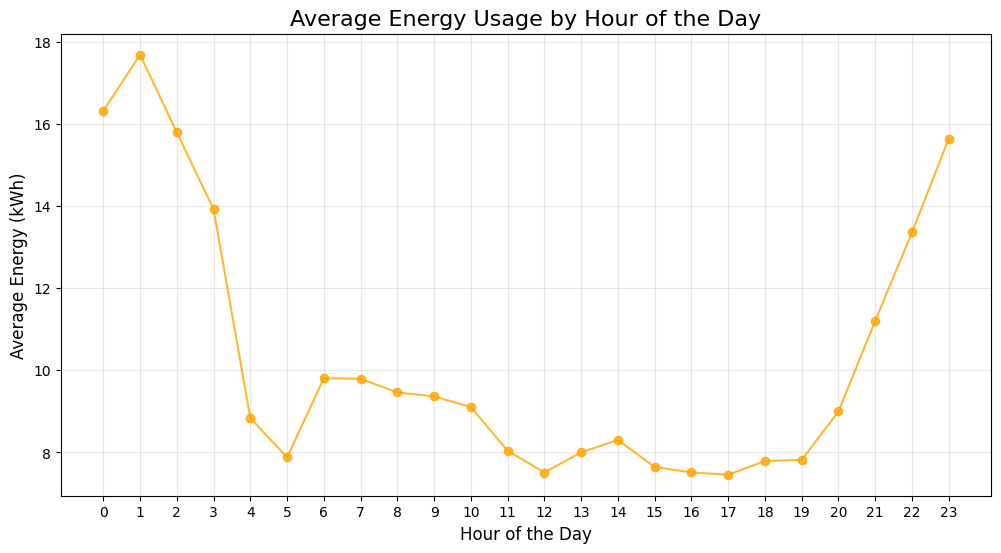

In [79]:
# Extract the hour from the 'Start Date' column
data['Hour'] = pd.to_datetime(data['Start Date']).dt.hour

# Group data by hour and calculate total and average energy usage
hourly_energy = data.groupby('Hour')['Energy (kWh)'].agg(['sum', 'mean']).reset_index()

# Plot total energy usage by hour
plt.figure(figsize=(12, 6))
plt.bar(hourly_energy['Hour'], hourly_energy['sum'], color='skyblue', alpha=0.7)
plt.title("Total Energy Usage by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Energy (kWh)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.show()

# Plot average energy usage by hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_energy['Hour'], hourly_energy['mean'], marker='o', color='orange', alpha=0.8)
plt.title("Average Energy Usage by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy (kWh)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.show()


#### Day vs Night

In [80]:
# Add a column for hour
data['Start Hour'] = data['Start Date'].dt.hour

# Categorize as day or night
data['Day/Night'] = data['Start Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Aggregate energy usage for day vs. night
day_night_summary = data.groupby(['User ID', 'Day/Night'])['Energy (kWh)'].sum().unstack()
print(day_night_summary)

Day/Night          Day       Night
User ID                           
0.0        1826.986851  972.758426
102.0        17.485545         NaN
107.0        25.489479    9.742033
111.0        80.422297   37.440954
140.0         3.225248    1.841047
...                ...         ...
997651        9.020000         NaN
997831     1045.527000    3.405000
998031       30.780000         NaN
998481       12.360000         NaN
99943        51.270966         NaN

[26971 rows x 2 columns]


In [84]:
print(day_night_summary.isnull().sum())

Day/Night
Day       4718
Night    14696
dtype: int64


In [85]:
day_night_summary.fillna(0, inplace=True)

In [86]:
print(day_night_summary.isnull().sum())

Day/Night
Day      0
Night    0
dtype: int64


In [87]:
day_night_summary

Day/Night,Day,Night
User ID,,
0.0,1826.986851,972.758426
102.0,17.485545,0.000000
107.0,25.489479,9.742033
111.0,80.422297,37.440954
140.0,3.225248,1.841047
...,...,...
997651,9.020000,0.000000
997831,1045.527000,3.405000
998031,30.780000,0.000000


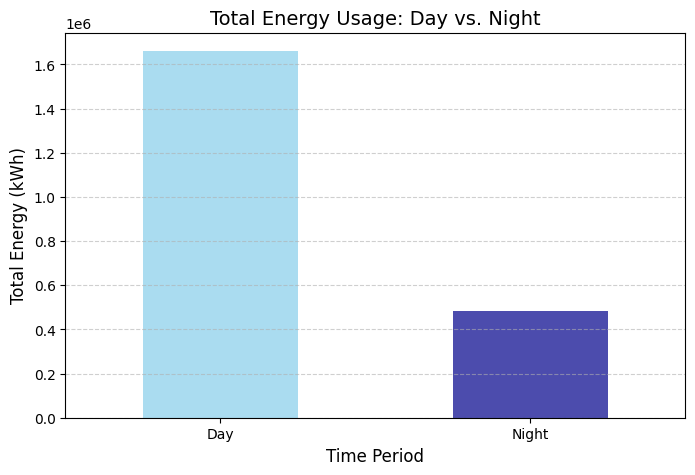

In [89]:
# Calculate total energy usage for Day and Night
total_energy = day_night_summary.sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
total_energy.plot(kind='bar', color=['skyblue', 'darkblue'], alpha=0.7)
plt.title('Total Energy Usage: Day vs. Night', fontsize=14)
plt.ylabel('Total Energy (kWh)', fontsize=12)
plt.xlabel('Time Period', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

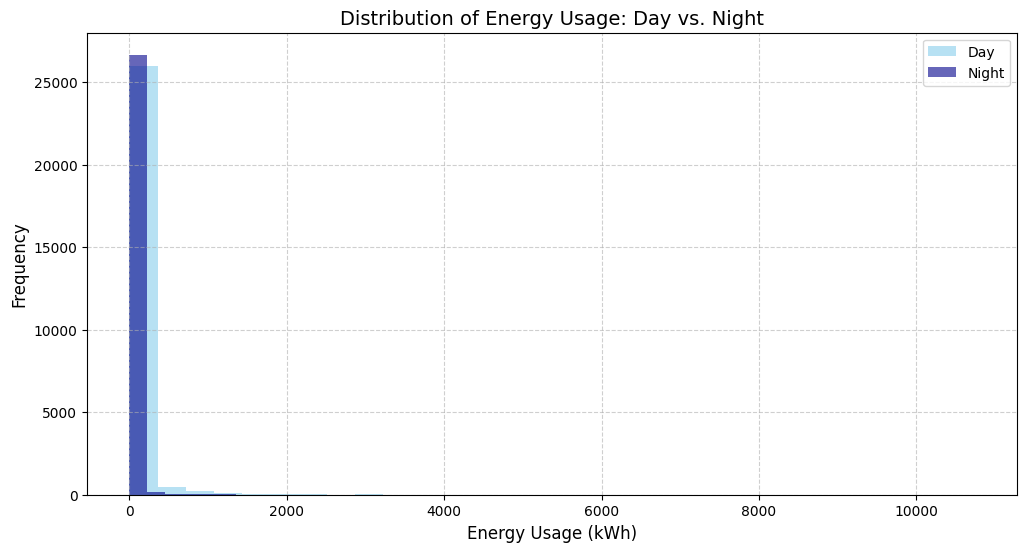

In [91]:
# Plot histograms for Day and Night energy usage
plt.figure(figsize=(12, 6))
plt.hist(day_night_summary['Day'], bins=30, alpha=0.6, label='Day', color='skyblue')
plt.hist(day_night_summary['Night'], bins=30, alpha=0.6, label='Night', color='darkblue')
plt.title('Distribution of Energy Usage: Day vs. Night', fontsize=14)
plt.xlabel('Energy Usage (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.show()

#### Geographical Location

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_1446/1539397643.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Longitude'], data['Latitude'], cmap='viridis', alpha=0.5)


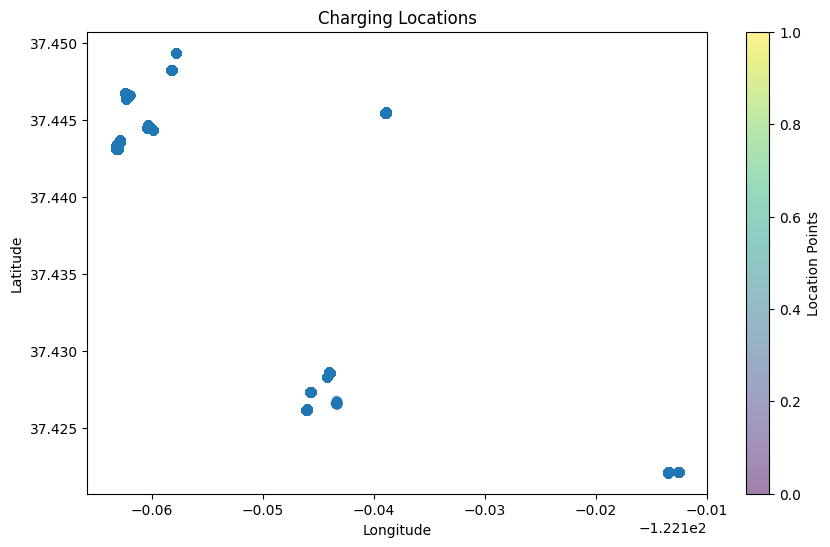

In [82]:
# Scatter plot of charging locations
plt.figure(figsize=(10, 6))

if 'User ID' in data.columns:
	plt.scatter(data['Longitude'], data['Latitude'], c=data['User ID'], cmap='viridis', alpha=0.5)
	plt.colorbar(label='User ID')
else:
	plt.scatter(data['Longitude'], data['Latitude'], cmap='viridis', alpha=0.5)
	plt.colorbar(label='Location Points')

plt.title('Charging Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Charcing system type

In [83]:
system_type_popularity = data['System S/N'].value_counts()
print(system_type_popularity)

System S/N
1.427410e+11    11105
1.640410e+11     9285
1.739410e+11     7637
1.742410e+11     7224
1.707410e+11     6578
                ...  
1.642410e+11       25
1.923410e+11       22
2.002410e+11       14
1.922410e+11        9
1.921410e+11        1
Name: count, Length: 81, dtype: int64


### **2: Prediction model**

## **Exploratory Component**
---

### **1: Infrastructure planning**

### **2: Campaigns to increase**

# **Conclusions**
---

# **Word Count**
---

In [40]:
import json

with open('Ditte.ipynb') as json_file:
    data = json.load(json_file)

print(data)

{'cells': [{'cell_type': 'code', 'execution_count': 1, 'metadata': {}, 'outputs': [], 'source': ['# Import necessary libraries\n', 'import pandas as pd\n', 'import numpy as np\n', 'import matplotlib.pyplot as plt\n', 'import seaborn as sns\n', 'from sklearn.cluster import KMeans\n', 'from sklearn.preprocessing import StandardScaler\n', 'from sklearn.decomposition import PCA']}, {'cell_type': 'code', 'execution_count': 2, 'metadata': {}, 'outputs': [{'name': 'stderr', 'output_type': 'stream', 'text': ['/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_1446/1789357619.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.\n', '  data = pd.read_csv(data_path)\n']}], 'source': ['# Load the dataset\n', "data_path = 'EVChargingStationUsage.csv'  # Update this path if needed\n", 'data = pd.read_csv(data_path)']}, {'cell_type': 'code', 'execution_count': 3, 'metadata': {}, 'outputs': [{'name': 'stdout', 'output_type': 'stream',

In [41]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

113


---

Max 2 sider

In [48]:
A4_tegn = 2400
to_sider = A4_tegn * 2
print(to_sider)

4800
